## CLT

Given i.i.d rv $X_k,k \in \mathbb Z_+$ with $\mathbb E X = 0, \mathbb E X^2 = 1$, the CLT theorem says that for $S_n = \frac{1}{\sqrt{n}} \sum_1^n X_k \to \mathcal N(0,1)$ in the sense of distribution. 

We are attempting to prove this using coupling and Wasserstein distance. 

## Notations

- $x,f,F$ are a random variable mentioned in the first paragraph, its pdf, and its cdf. 
- $y,g,G$ are a standard gaussian, its pdf, and its inverse cdf. 


## Coupling

For one dimentional random variable with good (can be inversed) enough cdf, we can do the coupling always by the following trick for coupling
```
sample u from uniform random variable
x = F_inverse(u)
y = G_inverse(u)

return (x,y)
```

In [32]:
import numpy as np
from scipy.stats import norm, expon
import scipy as sp
from matplotlib import pyplot as plt

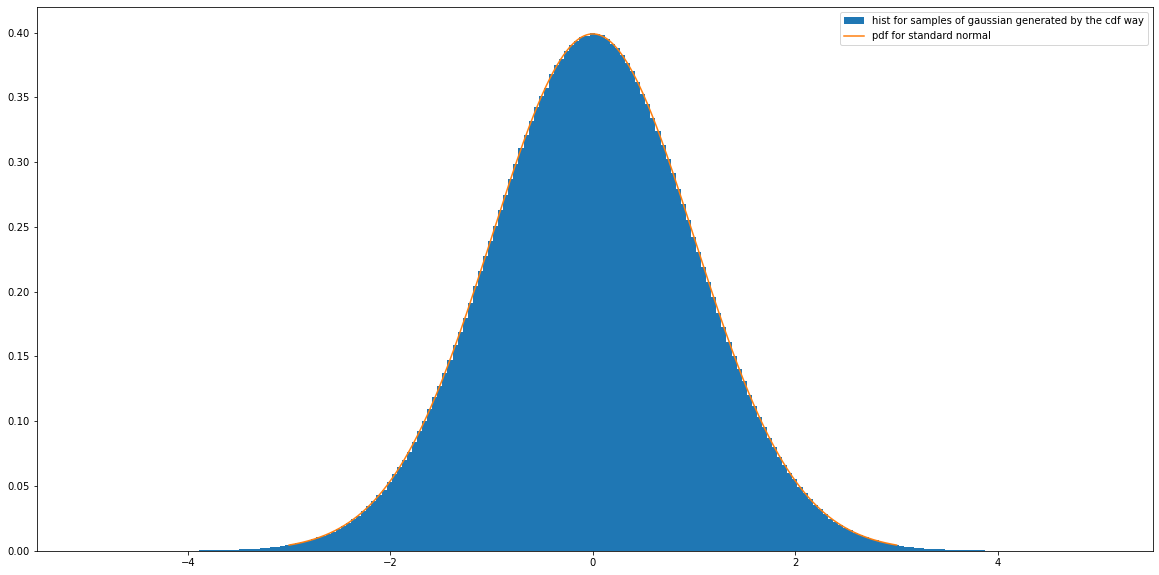

In [27]:
U = np.random.uniform(size=10000000)
Y = norm.ppf(U) # ppf is the inverse cdf 
x = np.linspace(-3,3,1000)
y = norm.pdf(x)
plt.figure(figsize=(20,10))
plt.hist(Y,bins=200,density=True,label='hist for samples of gaussian generated by the cdf way')
plt.plot(x,y,label='pdf for standard normal')
plt.legend()
print()

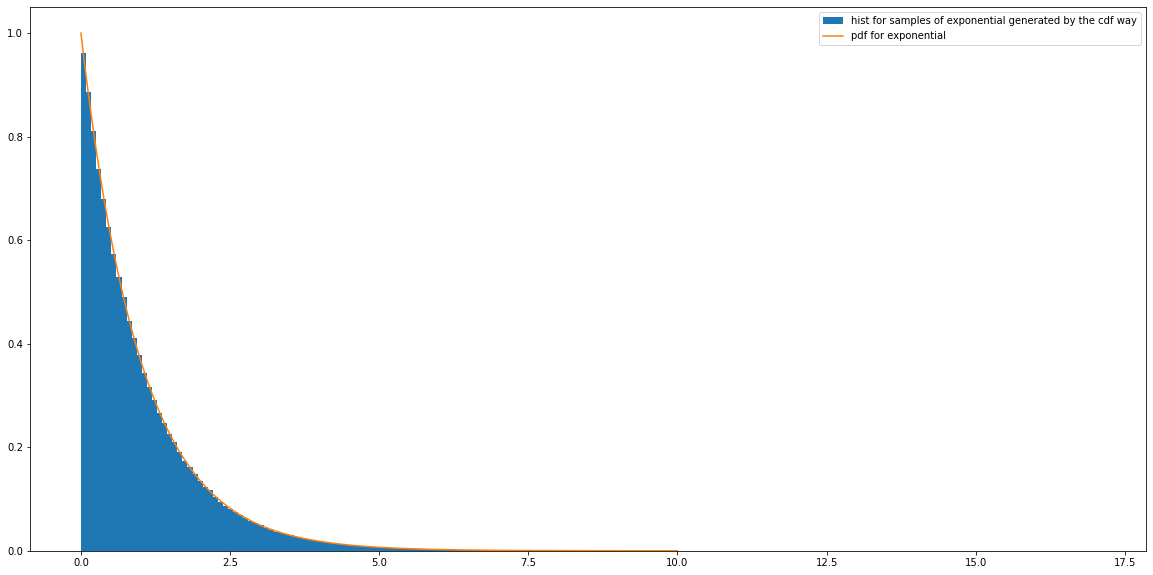

In [30]:
U = np.random.uniform(size=1000000)
Y = expon.ppf(U)
x = np.linspace(0,10,1000)
y = expon.pdf(x)
plt.figure(figsize=(20,10))
plt.hist(Y,bins=200,density=True,label='hist for samples of exponential generated by the cdf way')
plt.plot(x,y,label='pdf for exponential')
plt.legend()
print()

In [62]:
def F_inverse(u):
    return u - 0.5

In [63]:
U = np.linspace(0,1,100)[1:-1]
X = F_inverse(U)
Y = norm.ppf(U)

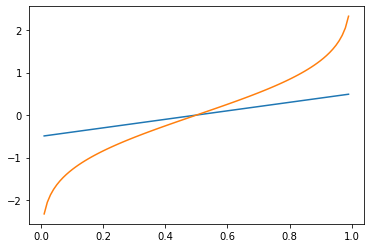

In [65]:
plt.plot(U,X)
plt.plot(U,Y)

In [67]:
def tobe_integrated(u):
    return norm.ppf(u)*F_inverse(u)

val,err = sp.integrate.quadrature(tobe_integrated,0,1,maxiter=1000)
val

0.28209291583347484

In [68]:
np.sqrt(2*(1-val))

1.198254634179668

The target is to find appropriate coupling scheme for the convergence. 